# Example of Plots using GEOtoPy

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

from mhpc_project.matsch_b2 import FullModel
from geotopy.utils import date_parser, comparison_plot

import scrapbook as sb

In [147]:
model = FullModel('../data/Matsch B2/geotop')
simulation = model()

# Rainfall Amount

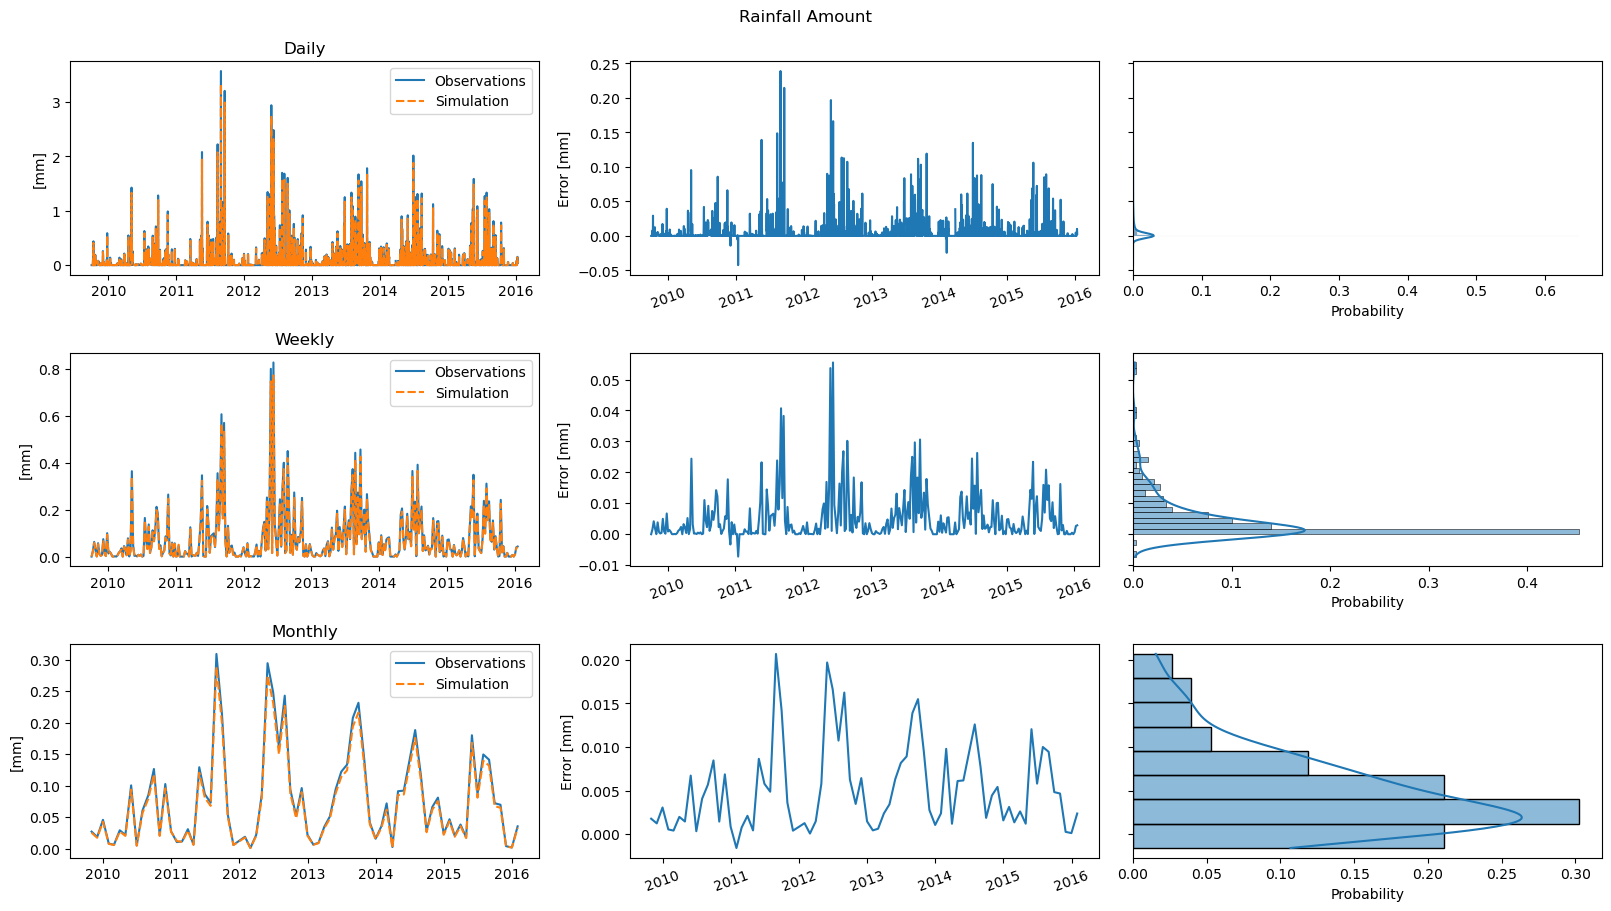

# Wind Speed

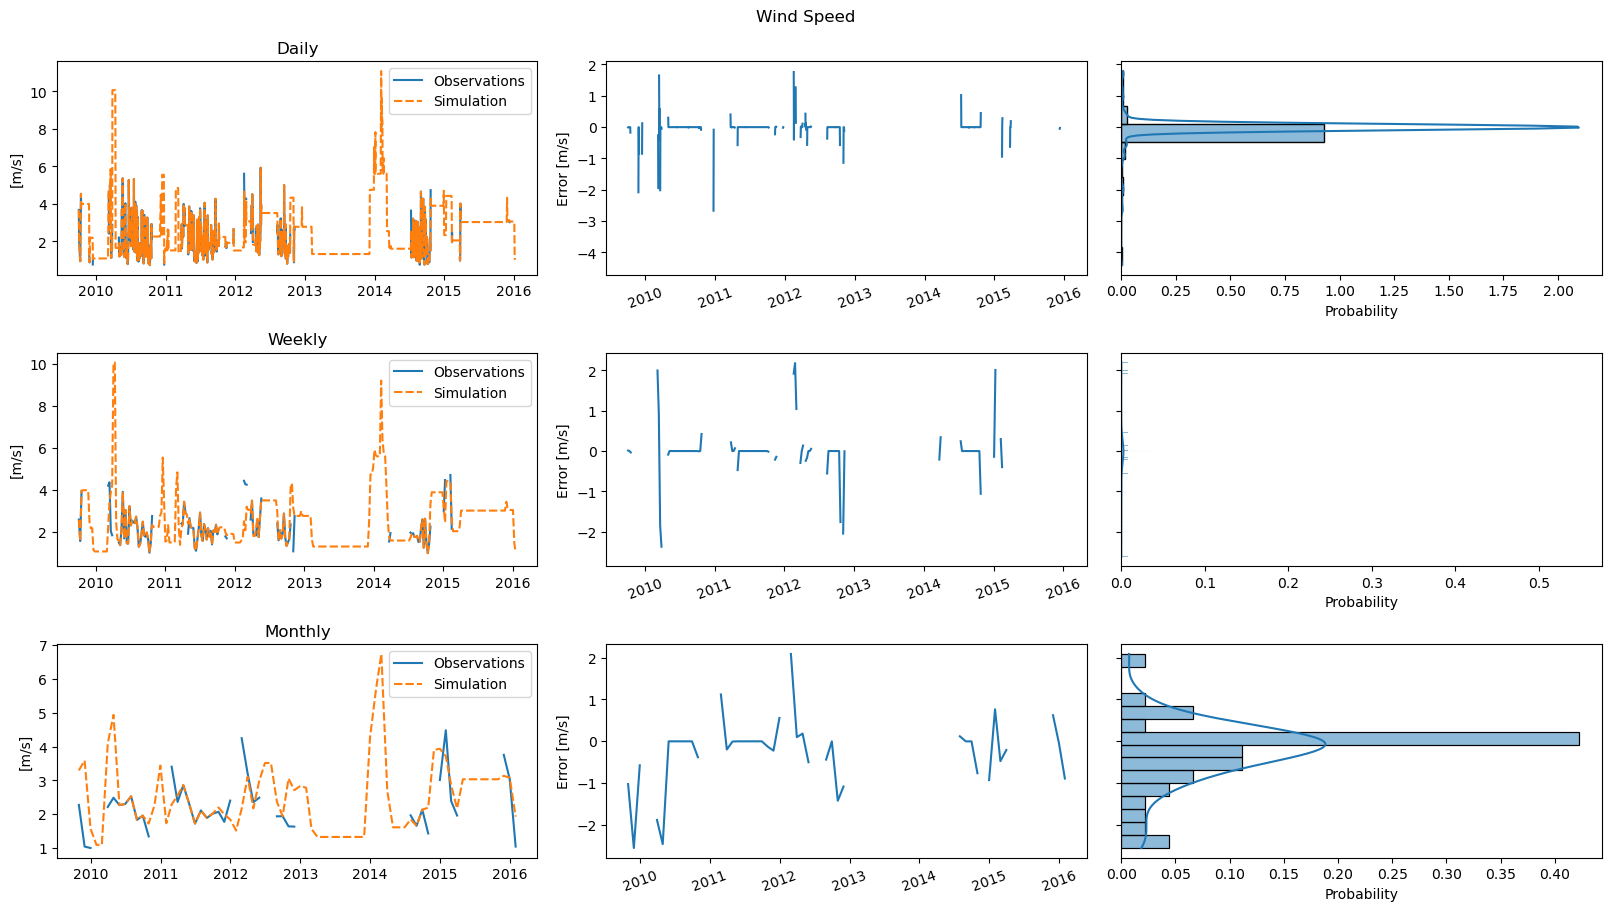

# Relative Humidity

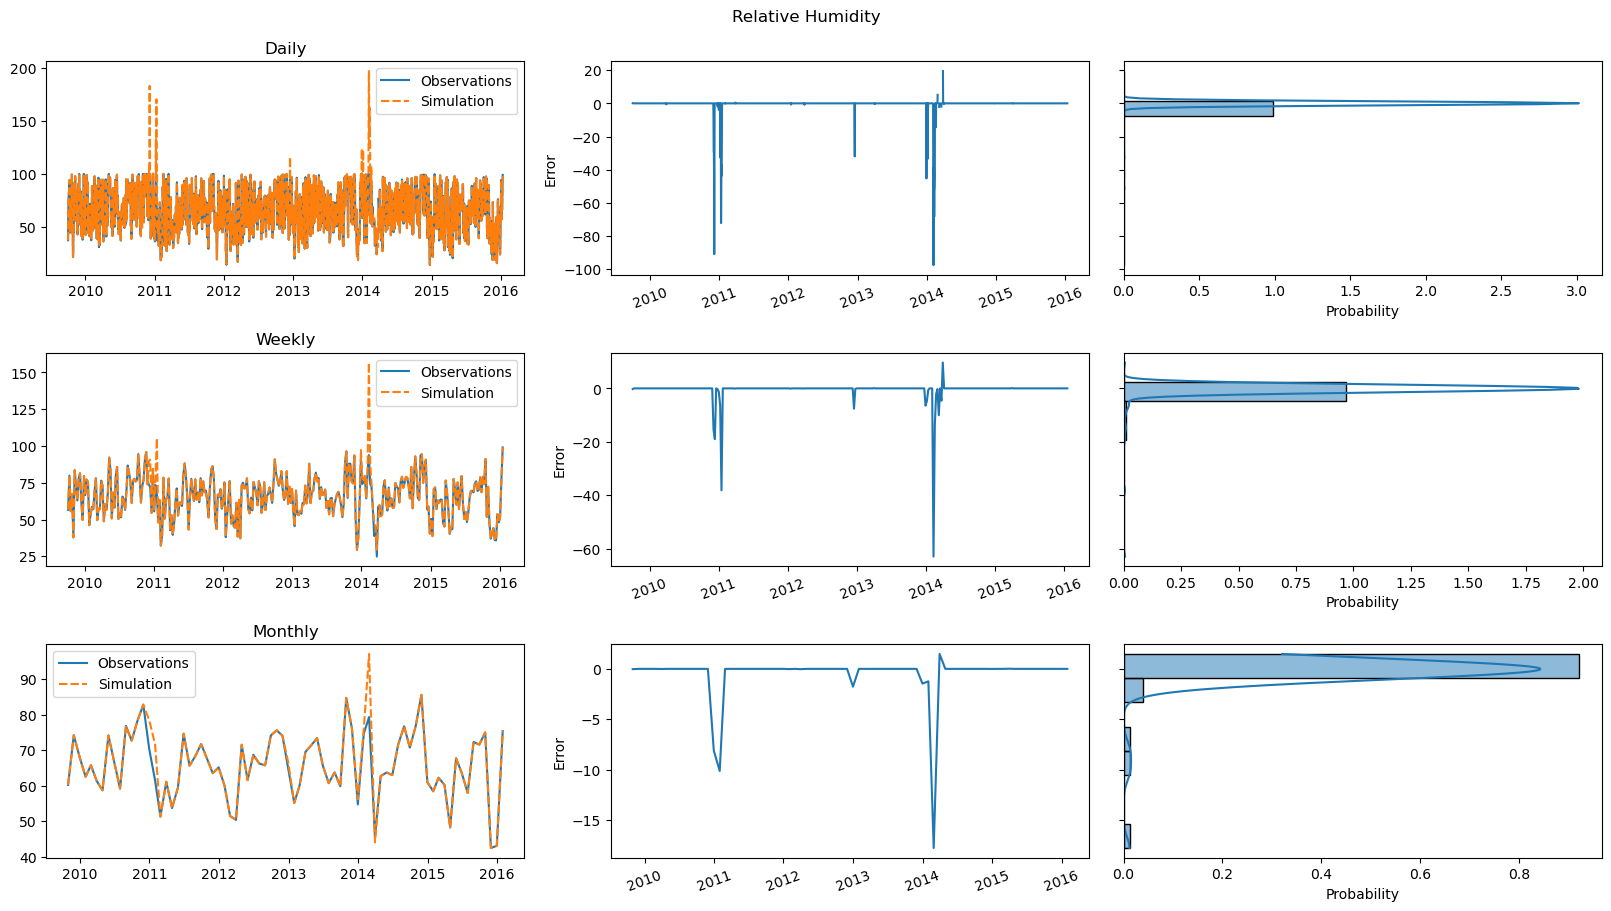

# Air Temperature

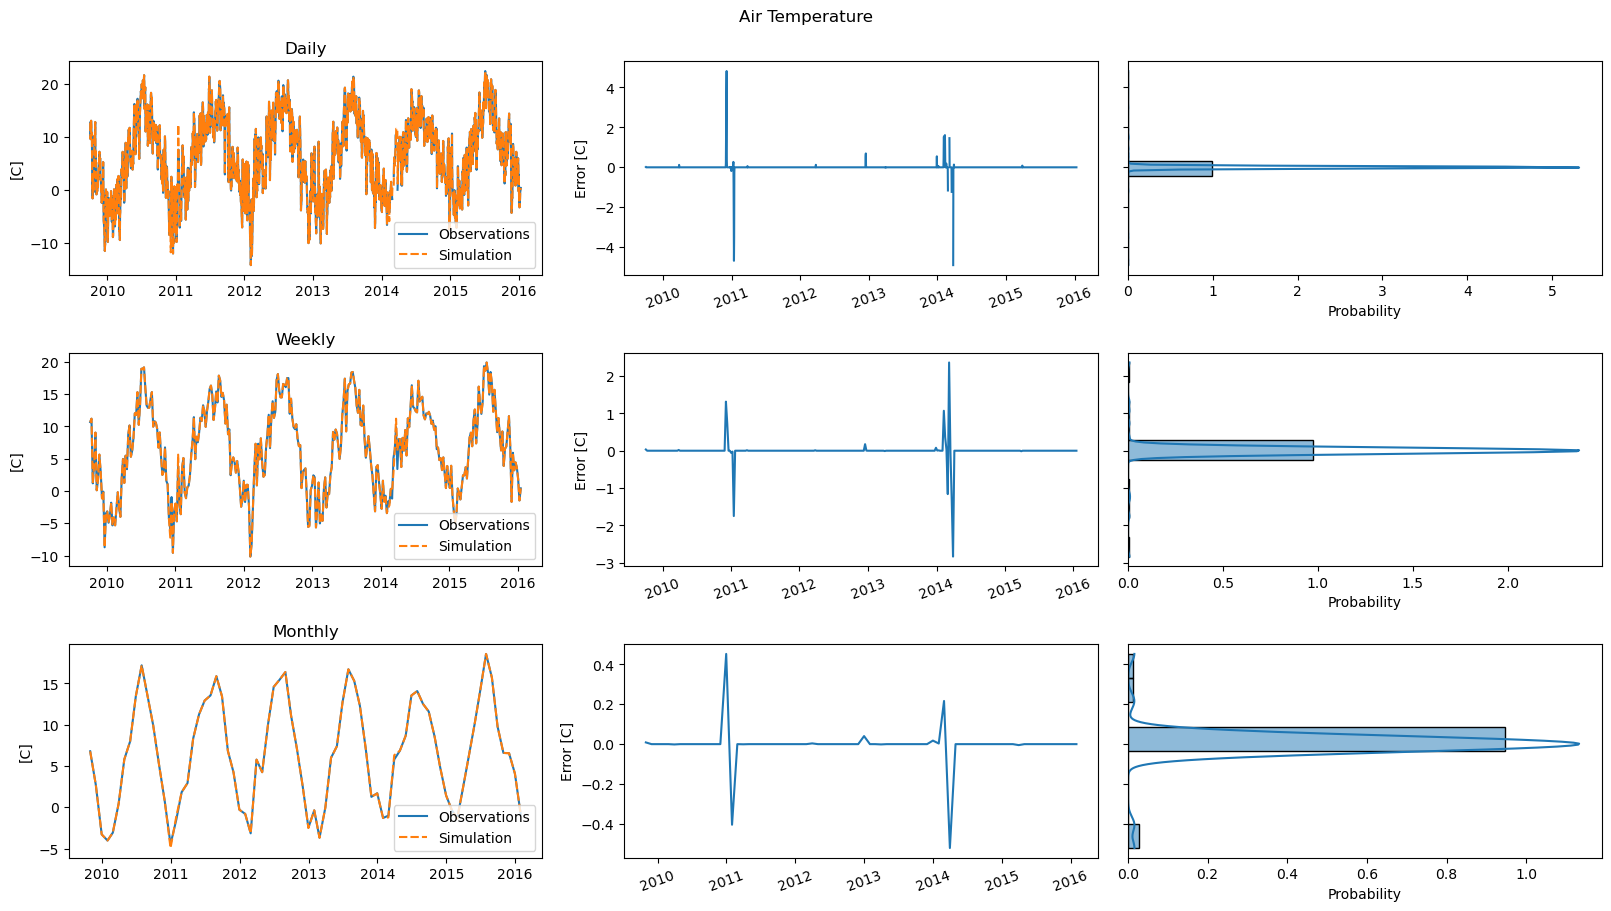

In [148]:
meteo_targets = [('rainfall_amount', 'mm', 'Rainfall Amount'),
                 ('wind_speed', 'm/s', 'Wind Speed'),
                 ('relative_humidity', None, 'Relative Humidity'),
                 ('air_temperature', 'C', 'Air Temperature')]

meteo = pd.read_csv('../data/Matsch B2/geotop/meteo0001.txt',
                           parse_dates=[0],
                           date_parser=date_parser,
                           na_values=-9999,
                           index_col=0)

for name, unit, desc in meteo_targets:
    display(Markdown(f"# {desc}"))
    fig = comparison_plot(meteo[name],
                          100 * simulation[name] if name == 'relative_humidity' else simulation[name],
                          desc=desc,
                          unit=unit)
    
    sb.glue(name, fig, 'display')
    plt.close()

# Downwelling Shortwave Flux

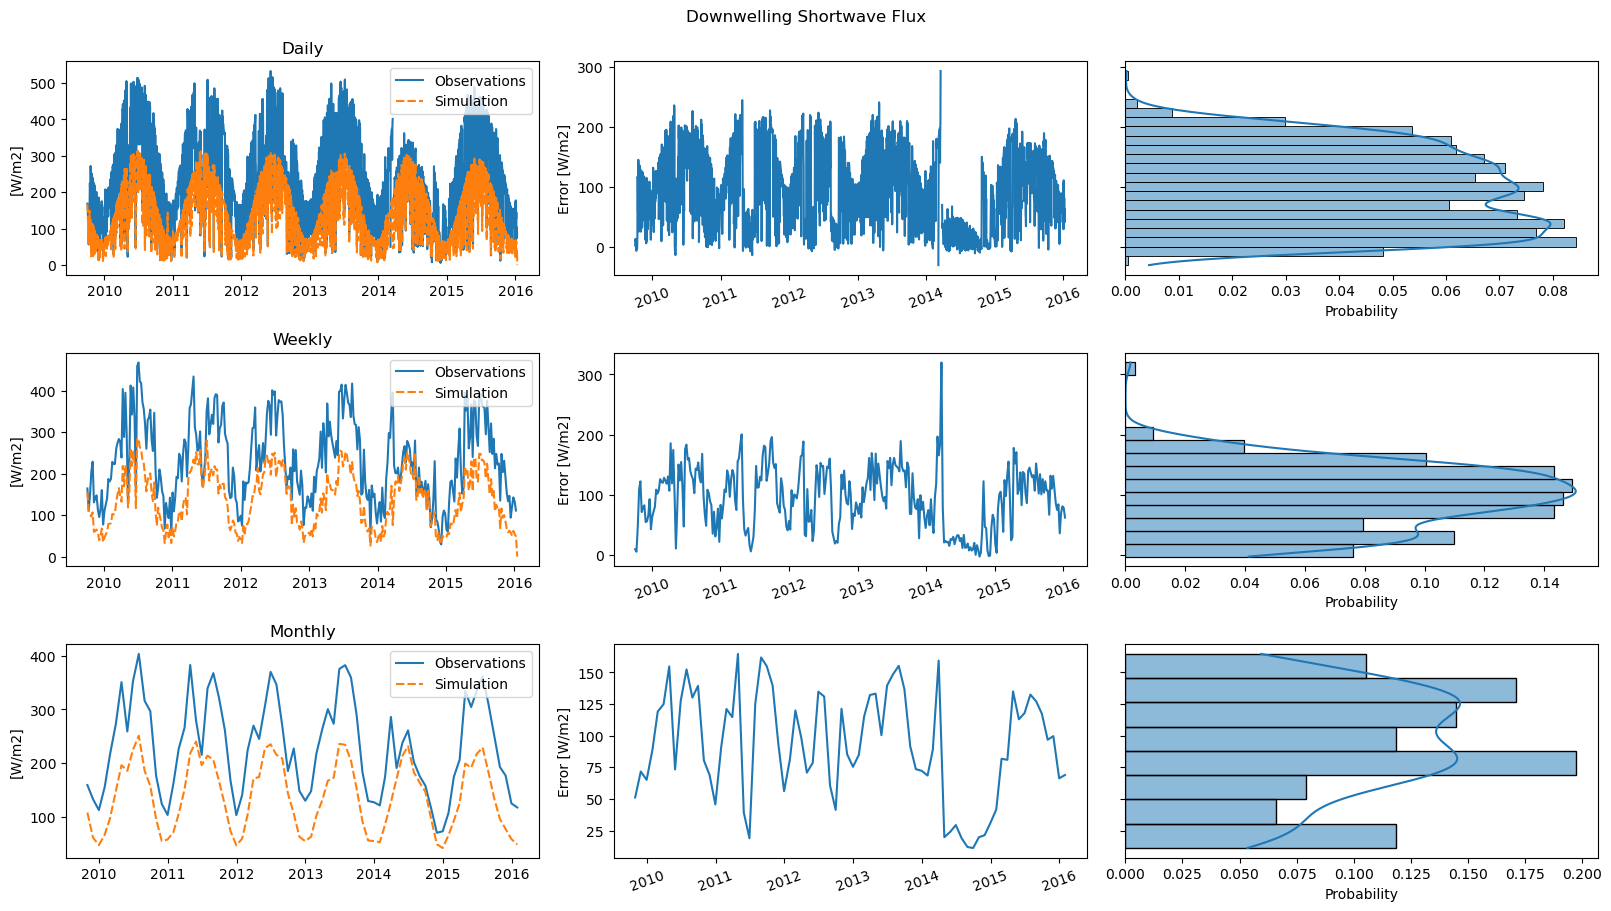

# Soil Moisture at 50mm

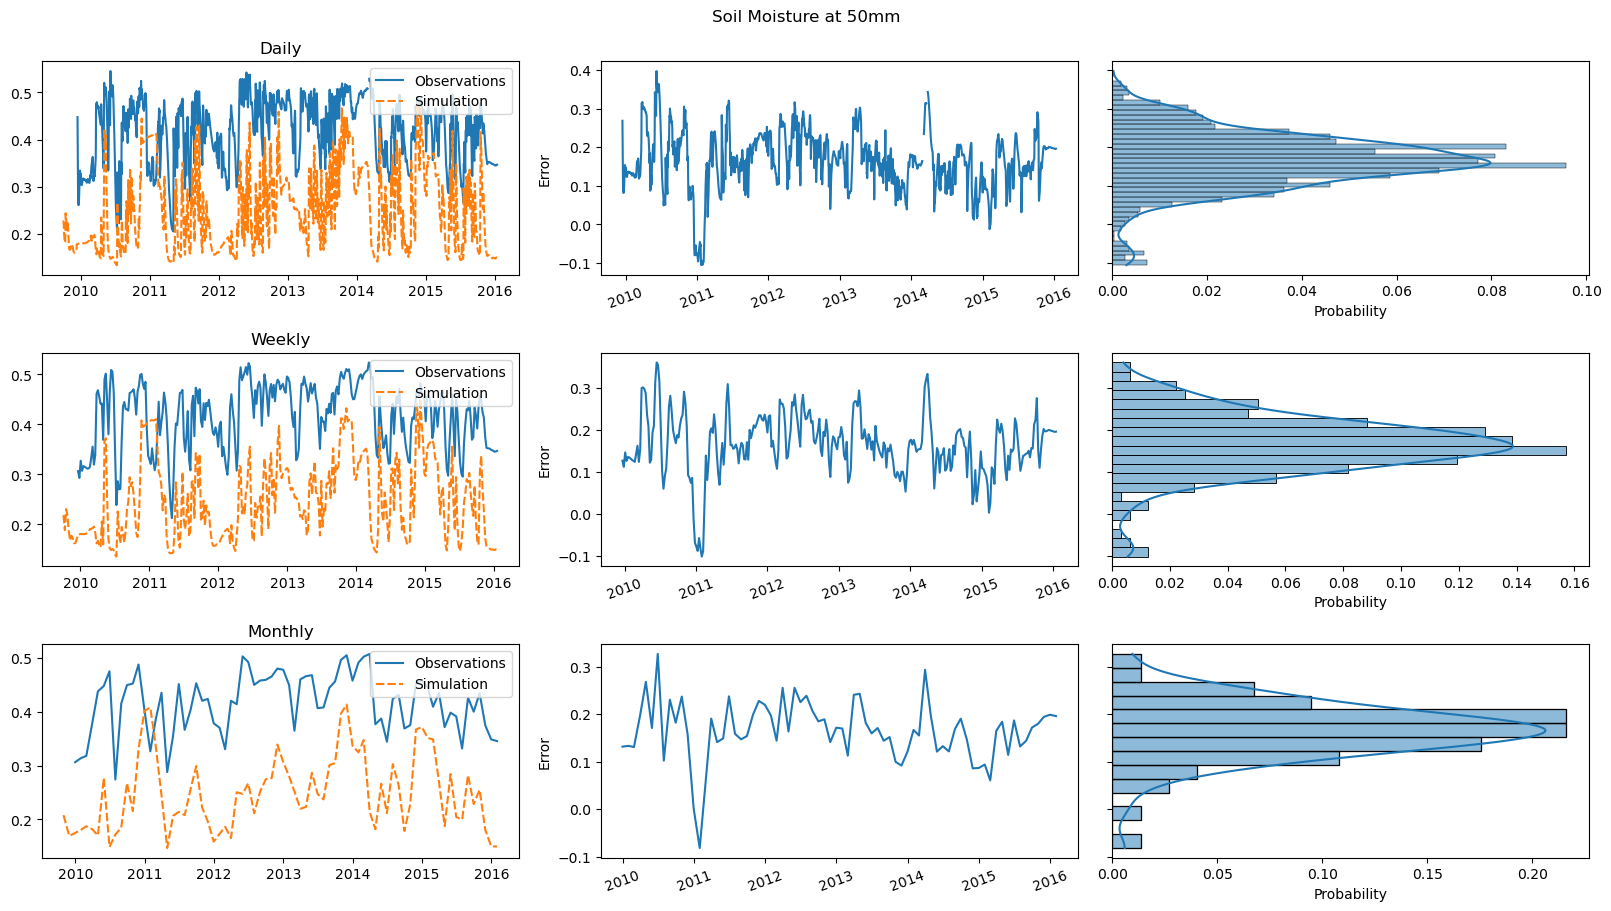

# Soil Moisture at 200mm

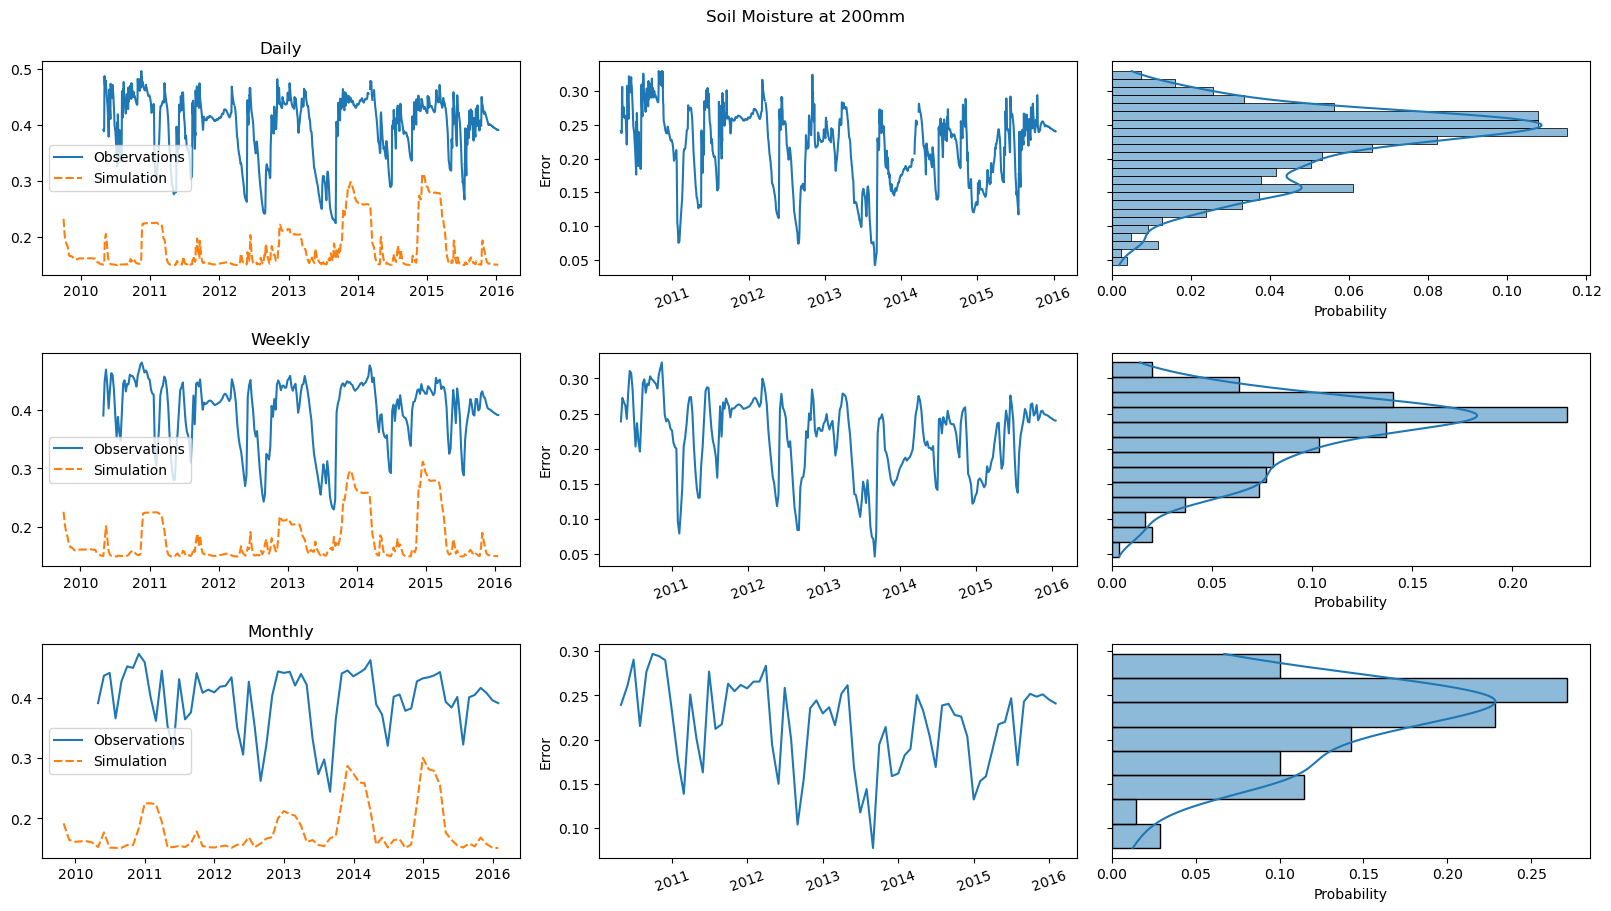

# Latent Heat Flux

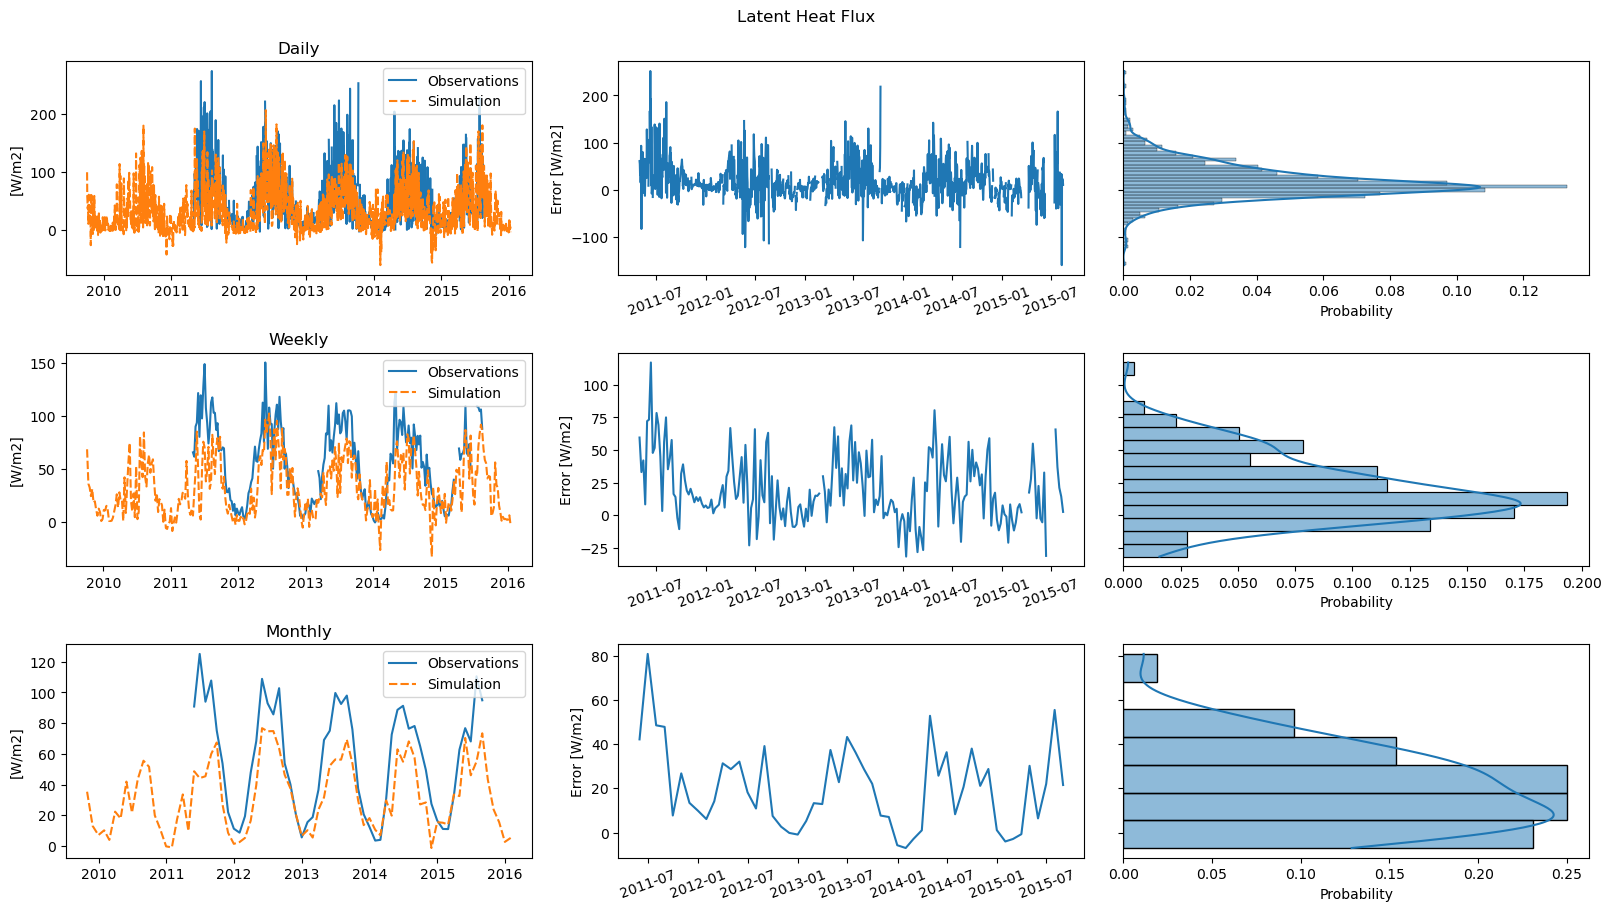

# Sensible Heat Flux

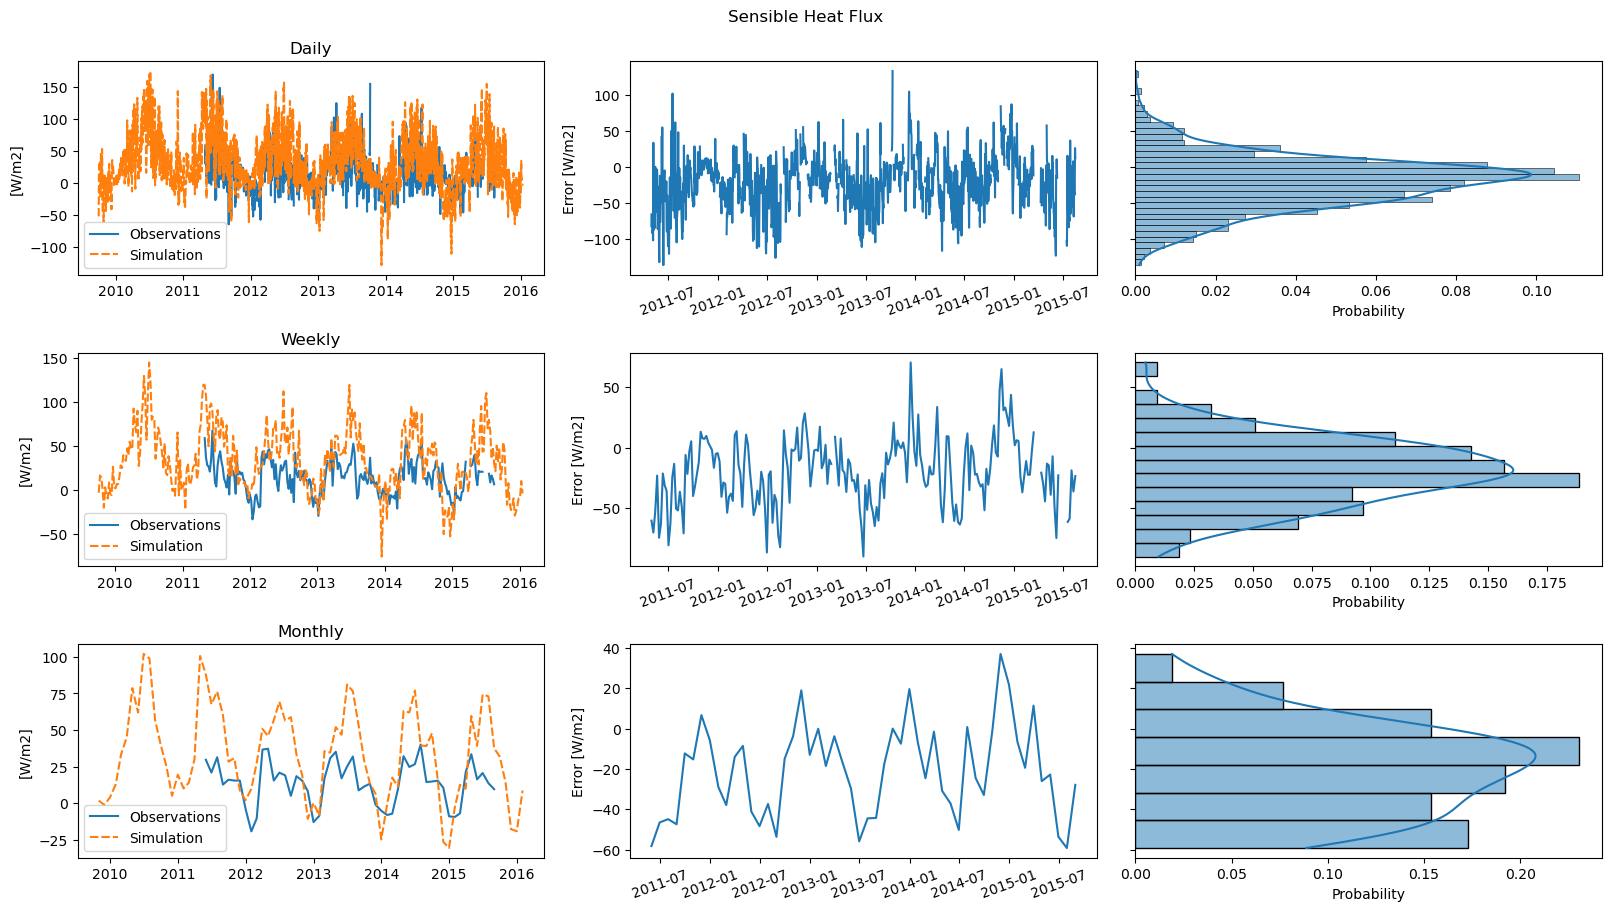

In [149]:
obs_targets = [('surface_downwelling_shortwave_flux', 'W/m2', 'Downwelling Shortwave Flux'),
           ('soil_moisture_content_50', None, 'Soil Moisture at 50mm'),
           ('soil_moisture_content_200', None, 'Soil Moisture at 200mm'),
           ('latent_heat_flux_in_air', 'W/m2', 'Latent Heat Flux'),
           ('sensible_heat_flux_in_air', 'W/m2', 'Sensible Heat Flux')]

observations = pd.read_csv('../data/Matsch B2/observations/obs.csv',
                           parse_dates=[0],
                           date_parser=date_parser,
                           index_col=0)

for name, unit, desc in obs_targets:
    display(Markdown(f"# {desc}"))
    fig = comparison_plot(observations[name],
                          simulation[name],
                          desc=desc,
                          unit=unit)
    
    sb.glue(name, fig, 'display')
    plt.close()